In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random



In [2]:
#Size of our input images
SIZE = 128

# Setting the training and testing datasets 

ImageDataGenerator.flow_from_directory: Takes the path to a directory & generates batches of augmented data.

In [3]:
batch_size = 64
datagen = ImageDataGenerator(rescale=1./255) # Typically used for data augmentation. Here it is only rescaling the image pixels value to range 0 to 1 in decimals

train_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'          # Class used for working with Autoencoders
    )

Found 179 images belonging to 1 classes.


In [4]:
validation_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive_val/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )


Found 30 images belonging to 1 classes.


In [54]:
anomaly_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Anomalies/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )


Found 6 images belonging to 1 classes.


# Checking the generators

See the sizes of each generator. Notice that the last one, does not contain any sample because we do not have negative samples, that is anomalies.

In [6]:
print("The training dataset has size: ", len(train_generator))
print("The training dataset has size: ", len(validation_generator))
print("The training dataset has size: ", len(anomaly_generator))

The training dataset has size:  3
The training dataset has size:  1
The training dataset has size:  0


The sizes above shown correspond to the number of bathces each of the generator contains. Recall that each batch size is of 64 elements.

## Iterating over the generators

In [97]:
batch_iterator = train_generator.next()
print(type(batch_iterator))
print(len(batch_iterator))
# print(batch_iterator)

<class 'tuple'>
2


As one bath length is of two. Let's see what each of these two elements consist of.

In [98]:
first_element = batch_iterator[0]
second_element = batch_iterator[1]
print(type(first_element))
print(first_element.shape)
print("******************")
print(type(second_element))
print(second_element.shape)

<class 'numpy.ndarray'>
(51, 128, 128, 3)
******************
<class 'numpy.ndarray'>
(51, 128, 128, 3)


See that each of the elements correspond to a "group" of 51 or 64 elements, where there are data of images of shape (128, 128) and finally each of these elements consist of 3 channels.

The curious part is that depending on which batch of the generator is chosen (executing the code that has the "next()" function) the length of the elements of contained in that batch vary between 51 and 64. It was expected always it to be 64, because it was set the batch size to be of 64 elements. 

Moreover, another question is: why when retrieving a batch, this one contains two elements? It was expected only to be one single element. 


This is another way to use the "next()" function.

In [37]:
batch_iterator2 = next(train_generator)
print(type(batch_iterator2))
print(len(batch_iterator2))


<class 'tuple'>
2


And also another way to directly enter one of the elements contained in the retrieved batch.

In [99]:
batch_iterator2 = next(train_generator)[1]
print(type(batch_iterator2))
print(batch_iterator2.shape)


<class 'numpy.ndarray'>
(64, 128, 128, 3)


In [105]:
for i in range(1):
    aux = next(train_generator)[0]
    print(type(aux))
    print(aux.shape)
    print(len(aux))


<class 'numpy.ndarray'>
(64, 128, 128, 3)
64


What "astype()" above does, is simply to convery the image data matrix from float values to be integers.

Now we will show the images contained in the batches.

Showing the images contained in only one batch. And from this batch, showing the images contained in both of its elements. The first element images are shown below:

Selecting batch number:  0
This is the element number 1 of the batch
The length of this element batch is:  64


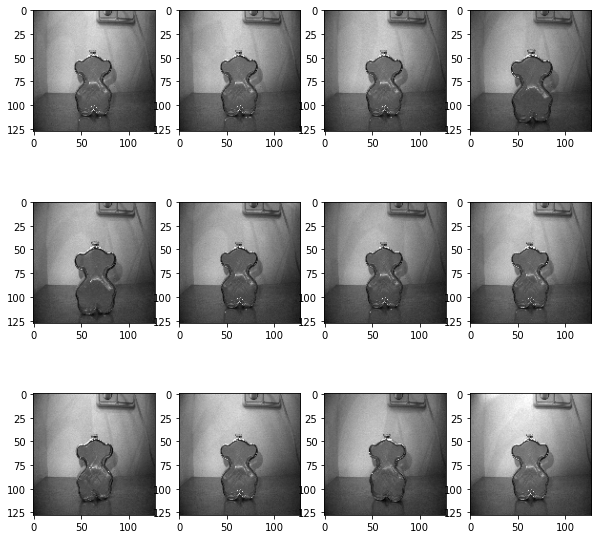

In [7]:
plt.figure(figsize=(10, 10))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    batch_iterator = train_generator.next()
    first_element_batch = batch_iterator[0]
    second_element_batch = batch_iterator[1]
    print("This is the element number 1 of the batch")
    print("The length of this element batch is: ", len(first_element_batch))
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        plt.imshow(first_element_batch[i])

And now, the second element images:

Selecting batch number:  0
This is the element number 2 of the batch
The length of this element batch is:  64


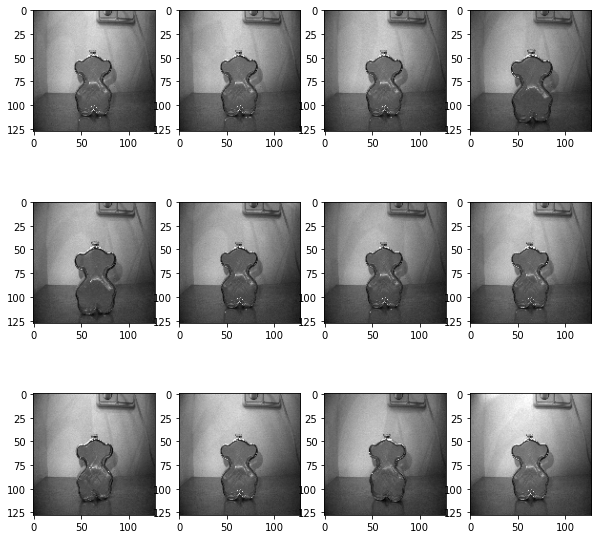

In [8]:
plt.figure(figsize=(10, 10))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    print("This is the element number 2 of the batch")
    print("The length of this element batch is: ", len(second_element_batch))
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        plt.imshow(second_element_batch[i])

Here, showing the images from the first and second element of the batch side by side.

Selecting batch number:  0
The length of this element batch is:  64


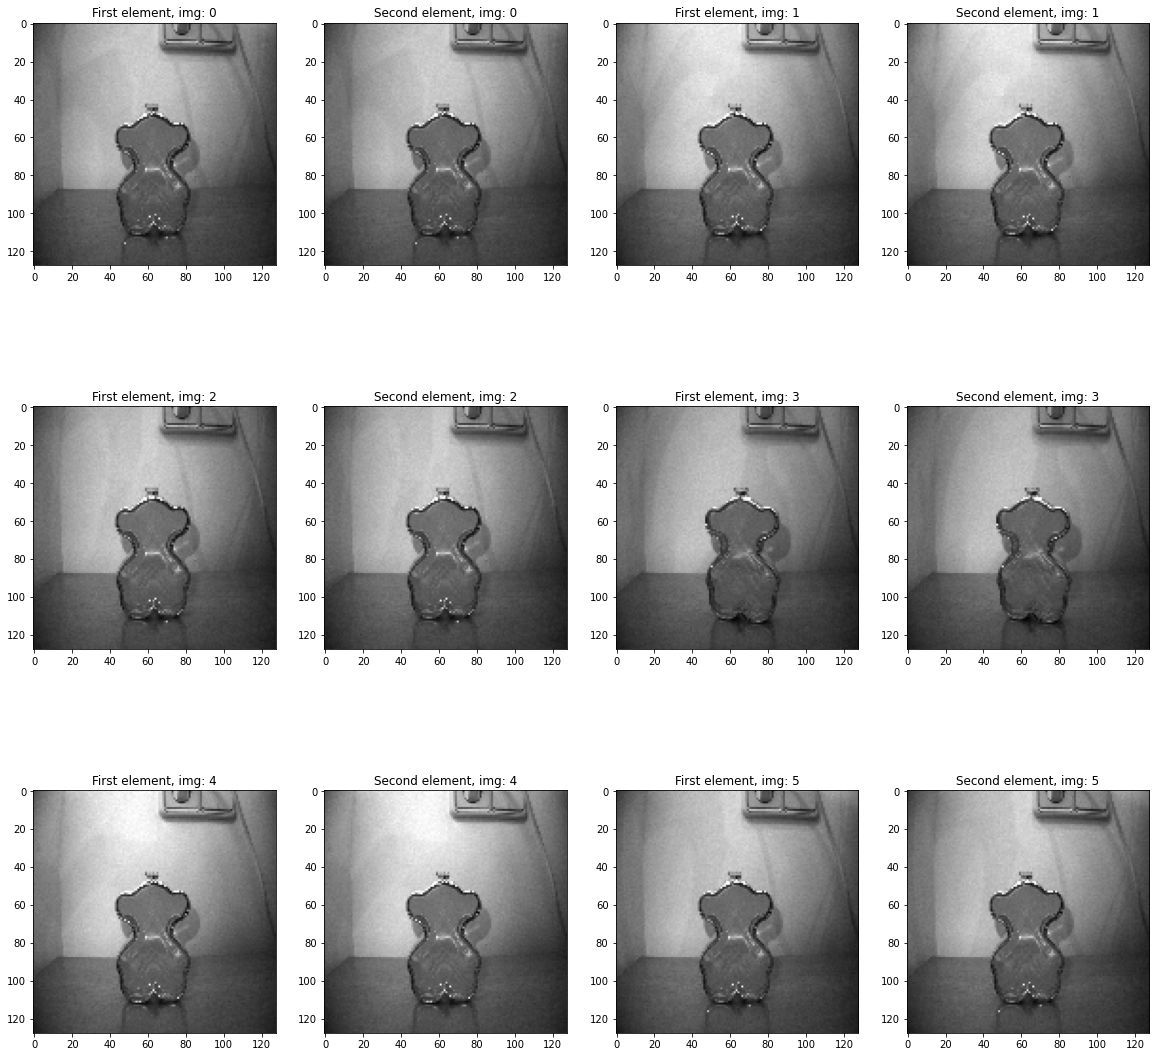

In [9]:
plt.figure(figsize=(20, 20))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    batch_iterator = train_generator.next()
    first_element_batch = batch_iterator[0]
    second_element_batch = batch_iterator[1]
    print("The length of this element batch is: ", len(first_element_batch))
    image_to_show = 0
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        if (i % 2 == 0):
            plt.imshow(first_element_batch[image_to_show])
            plt.title("First element, img: %i" %image_to_show)
        else:
            plt.imshow(second_element_batch[image_to_show])
            plt.title("Second element, img: %i" %image_to_show)
            image_to_show = image_to_show+1


See that the images of each element of the batch are pretty similar, if not the same. This might be due to the fact that the image generator function only rescales the image pixels to float values ranging from 0 to 1. 

<code> datagen = ImageDataGenerator(rescale=1./255) # Typically used for data augmentation. Here it is only rescaling the image pixels value to range 0 to 1 in decimals </code>


Next, it is interesting to know until which point the next() function of the DataGeneration class can go.

In [145]:
print("The size of the train generator is: ", len(train_generator))

The size of the train generator is:  3


In [146]:
print("The current index of the train generator is: ", train_generator.batch_index)

The current index of the train generator is:  2


In [147]:
i = 0
for batch_iterator in range(7):
    print("The current index of the train generator is: ", train_generator.batch_index)
    train_generator.next()
    print("External counter is: ", i)
    i=i+1
    print("\n")

The current index of the train generator is:  2
External counter is:  0


The current index of the train generator is:  0
External counter is:  1


The current index of the train generator is:  1
External counter is:  2


The current index of the train generator is:  2
External counter is:  3


The current index of the train generator is:  0
External counter is:  4


The current index of the train generator is:  1
External counter is:  5


The current index of the train generator is:  2
External counter is:  6




From above, it can be seen that the "next()" function works as expected. It iterates over the possible indexes it can take.

## Trying with augmented data 

It was believed that the first and second element of the batch are the same image because the data augmentation that we had for the example consisted only on rescaling the pixel values. In this section different data augmentation will be tested.

In [159]:
batch_size = 64
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True) # Typically used for data augmentation. Here it is  rescaling the image pixels value to range 0 to 1 in decimals and applying horizontal and vertical flip

train_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'          # Class used for working with Autoencoders
    )


Found 179 images belonging to 1 classes.


Selecting batch number:  0
The length of this element batch is:  51


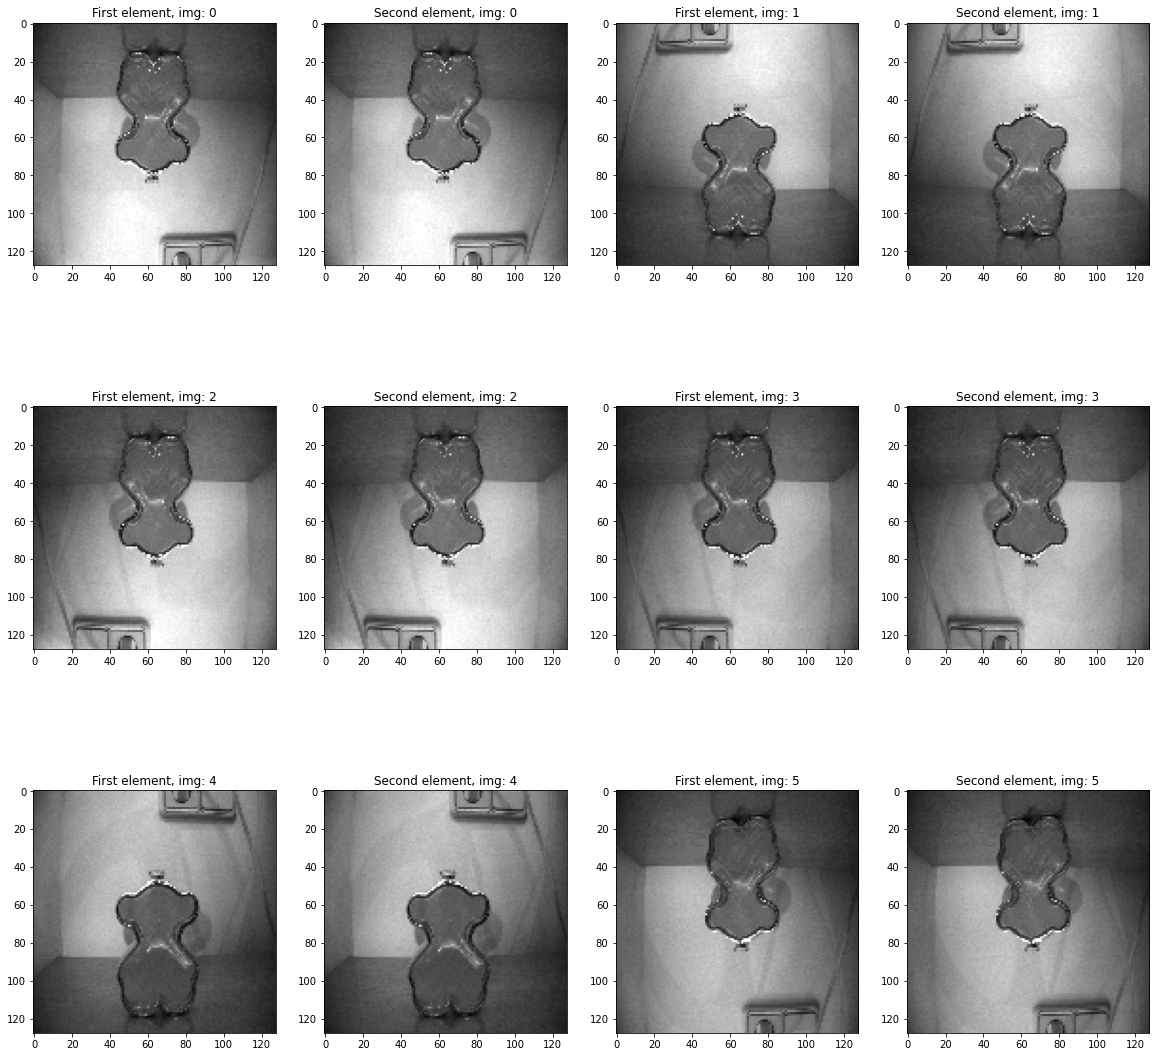

In [162]:
plt.figure(figsize=(20, 20))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    batch_iterator = train_generator.next()
    first_element_batch = batch_iterator[0]
    second_element_batch = batch_iterator[1]
    print("The length of this element batch is: ", len(first_element_batch))
    image_to_show = 0
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        if (i % 2 == 0):
            plt.imshow(first_element_batch[image_to_show])
            plt.title("First element, img: %i" %image_to_show)
        else:
            plt.imshow(second_element_batch[image_to_show])
            plt.title("Second element, img: %i" %image_to_show)
            image_to_show = image_to_show+1

Notice that the flipping of the data augmentation made its effect on the images, however the following is worth mentioning:
- The flipping is not applied to all images. See the second and fourth images, these did not get flipped.
- Still the first and second element are the same. It means that the effect of the data augmentation is directly applied to both elements. Hence, we still don't know why we have these two elements of a batch. Only one element was expected.
- Finally, we still don't know why sometimes the length of the batch is 51.

# Configuring the Autoencoder netwrok

In [10]:
#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0

In [12]:
500//64


7

In [13]:
#Fit the model. 
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,     # The // operator refers to a floor division, rouding down to the nearest whole number
        epochs=200,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True)

Epoch 1/200
7/7 [==============================] - 8s 823ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0375 - val_mse: 0.0375


See that above, the training of the model is stopped because the trainig generator did not provide the minimum number of batches for it to be trained. According to the message displayed above, the model expects at least 1400 batches.

Let's try another configuration for the model training. Here, we don't specify the steps per epoch. Resulting in a three-step long epoch, because the entire training model contains 3 batches.

In [14]:
#Fit the model. 
history = model.fit(
        train_generator,
        epochs=200,
        validation_data=validation_generator,
        shuffle = True)

Epoch 1/200
3/3 [==============================] - 6s 2s/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 2/200
3/3 [==============================] - 5s 2s/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 3/200
3/3 [==============================] - 5s 2s/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 4/200
3/3 [==============================] - 5s 2s/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 5/200
3/3 [==============================] - 5s 2s/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 6/200
3/3 [==============================] - 6s 2s/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 7/200
3/3 [==============================] - 5s 2s/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 8/200
3/3 [==============================] - 6s 2s/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0

According to the Keras documentation, as a paremeter to the fit() function, we can also pass a generator for its two first parameters. See the image below. See more references: <https://keras.io/api/models/model_training_apis/>

![alt text](../Image5.png "Title")

In [20]:
model_version = 'BottlesModel1'
model.save(f"../../BottlesAnomalies_TFM/models/{model_version}")

INFO:tensorflow:Assets written to: ../../BottlesAnomalies_TFM/models/BottlesModel1\assets


INFO:tensorflow:Assets written to: ../../BottlesAnomalies_TFM/models/BottlesModel1\assets


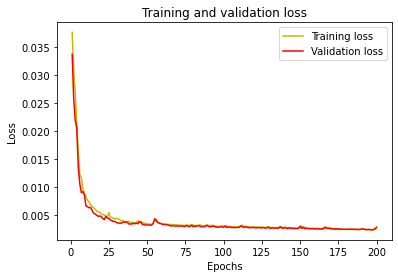

In [21]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Get all batches generated by the datagen and pick a batch for prediction

In [48]:
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
# while img_num <= len(train_generator):        #I think this should be the correct while clause
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1
    
print("number of batches are: ", img_num)


number of batches are:  3


Predict on the first batch of images. Do also notice that the prediction is being carried out over the images we used for training.

In [49]:
predicted = model.predict(data_batch[0])  


2/2 [==============================] - 0s 128ms/step


In [50]:
predicted.shape

(64, 128, 128, 3)

The above is 64 length because it corresponds to the 64 predicted images of a batch. Recall that the predictions are reconstructions of the input images, since we are working with the autoencoder network.

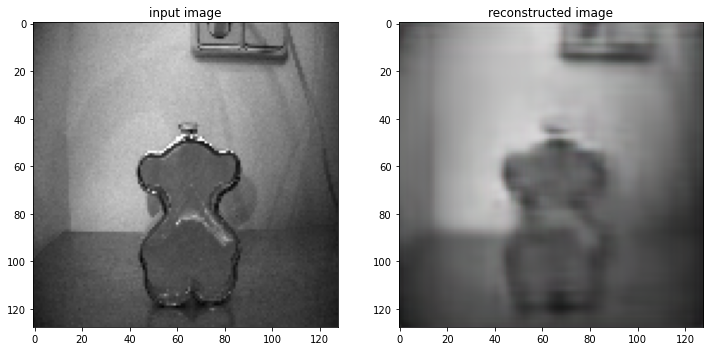

In [51]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("input image")
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.title("reconstructed image")
plt.imshow(predicted[image_number])
plt.show()

As it can be seen above, the reconstruction is not that good, it is very blurry. However, we can see to generate negative artificial samples and see if these are capable of being detected as such.

Let us examine the reconstruction error between our validation data (good/normal images) and the anomaly images

In [52]:
validation_error = model.evaluate_generator(validation_generator)
print("Recon. error for the validation (normal) data is: ", validation_error)

<ipython-input-52-c517973fb429>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_error = model.evaluate_generator(validation_generator)


Recon. error for the validation (normal) data is:  [0.002775531029328704, 0.002775531029328704]


Here above we see a vector with two components which happen to be the same between them. This is because in the model, when we define the outputs, the loss function type and the metric are the same parameter, the mse (mean square error).

This reconstruction error above should be very low, since the validation generator is full of normal images (good images)

Whereas the reconstruction error here below, for the "anomaly_generator" should be higher, since this dataset is comprised of full anomaly images.

In [55]:
anomaly_error = model.evaluate_generator(anomaly_generator)
print("Recon. error for the anomaly data is: ", anomaly_error)

<ipython-input-55-eac880c98ec2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  anomaly_error = model.evaluate_generator(anomaly_generator)


Recon. error for the anomaly data is:  [0.0028120658826082945, 0.0028120658826082945]


See that this error is slightly higher than the error in the validation dataset. This is good, but the difference is not that significant and this could result in wrong anomaly detections. Let's see some detections.

The following function performs:
- Initialize a vector for storing the reconstruction errors.
- A for loop that traverses all the images contained in a batch.
    - Take the one image of the batch.
    - Add a new size dimension to the image.
    - Make a prediction of the selected image with the model that was built.
    - Evaluate the performance of the prediction, i.e. compute the prediction error.
    - Append the reconstruction error into a list.
- Compute the mean and std deviation of the error.
 

In [56]:
def calc_recon_error(batch_images):   
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        recon_error_list.append(reconstruction_error)   
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_recon_error, stdev_recon_error

In [57]:
#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images. 
#For this let us generate a batch of images for each. 
train_batch = train_generator.next()[0]     # This is the uninfected images
anomaly_batch = anomaly_generator.next()[0] # This is the parasitized images

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)

1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - mse: 0.0059


In [58]:
print(uninfected_values)
print(anomaly_values)

(0.005985191498424799, 0.0004528352473785281)
(0.0061650553718209265, 0.0006302892755465398)


In [87]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    reconstruction_error_threshold = 0.006 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    plt.imshow(img)
    img = img / 255.
    print(img.shape)
    img = img[np.newaxis, :,:,:]
    
    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly") 
    else:
        print("The image is NOT an anomaly")

In [69]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
anomaly_file_paths = glob.glob(r'D:\Alex2023\TFM\Images\BottleStoodUp_atNight\Anomalies\Anomalies_samples\*')
positive_file_paths = glob.glob(r'D:\Alex2023\TFM\Images\BottleStoodUp_atNight\Positive\Positive_samples\*')

(128, 128, 3)
1/1 [==============================] - ETA: 0s - loss: 0.0063 - mse: 0.0063

<ipython-input-87-1c4cab0e39ea>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 40ms/step - loss: 0.0063 - mse: 0.0063
The image is an anomaly
D:\Alex2023\TFM\Images\BottleStoodUp_atNight\Anomalies\Anomalies_samples\img2.jpg


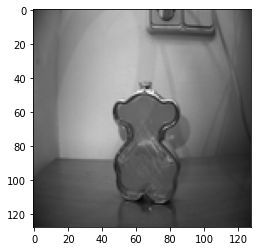

In [88]:
#Anomaly image verification
num=random.randint(0,len(anomaly_file_paths)-1)
check_anomaly(anomaly_file_paths[num])
print(anomaly_file_paths[num])

(128, 128)


<ipython-input-87-1c4cab0e39ea>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

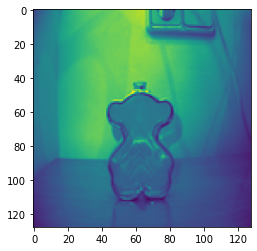

In [89]:
#Good/normal image verification
num=random.randint(0,len(positive_file_paths)-1)
check_anomaly(positive_file_paths[num])

In [91]:
print(anomaly_file_paths)

['D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img1.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img2.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img3.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img4.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img5.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img6.jpg']


In [92]:
print(positive_file_paths)

['D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_0.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_1.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_10.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_11.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_12.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_13.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_14.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_15.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_16.bmp', 'D:\\Alex20

In [106]:
img  = Image.open('D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_0.bmp')
print(img.size)
img = np.array(img.resize((128,128), Image.ANTIALIAS))
print(img.shape)

(1600, 1200)
(128, 128)


<ipython-input-106-ee79bde08c72>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


In [108]:
img  = Image.open('D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img1.jpg')
print(img.size)
img = np.array(img.resize((128,128), Image.ANTIALIAS))
print(img.shape)

(1600, 1200)
(128, 128, 3)


<ipython-input-108-4fc56d7cc05a>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


In [109]:
print(img)

[[[53 53 53]
  [57 57 57]
  [63 63 63]
  ...
  [54 54 54]
  [48 48 48]
  [45 45 45]]

 [[56 56 56]
  [60 60 60]
  [65 65 65]
  ...
  [55 55 55]
  [50 50 50]
  [45 45 45]]

 [[57 57 57]
  [62 62 62]
  [67 67 67]
  ...
  [57 57 57]
  [52 52 52]
  [47 47 47]]

 ...

 [[25 25 25]
  [27 27 27]
  [29 29 29]
  ...
  [31 31 31]
  [28 28 28]
  [26 26 26]]

 [[24 24 24]
  [26 26 26]
  [28 28 28]
  ...
  [30 30 30]
  [28 28 28]
  [26 26 26]]

 [[22 22 22]
  [25 25 25]
  [27 27 27]
  ...
  [29 29 29]
  [27 27 27]
  [24 24 24]]]


(128, 128)


<ipython-input-102-03a926e0d862>:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


In [ ]:
plt.figure(figsize=(20, 20))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    batch_iterator = train_generator.next()
    first_element_batch = batch_iterator[0]
    second_element_batch = batch_iterator[1]
    print("The length of this element batch is: ", len(first_element_batch))
    image_to_show = 0
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        if (i % 2 == 0):
            plt.imshow(first_element_batch[image_to_show])
            plt.title("First element, img: %i" %image_to_show)
        else:
            plt.imshow(second_element_batch[image_to_show])
            plt.title("Second element, img: %i" %image_to_show)
            image_to_show = image_to_show+1

# Working on the latent space of the model

This is a different approach of setting a threshold and detecting an anomaly. Instead of working directly with the error metric at the end of the model, it will be reached until the latent space of the model and in here a threshold value will be selected.

Let us extract (or build) the encoder network, with trained weights.

This is used to get the compressed output (latent space) of the input image. 

The compressed output is then used to calculate the KDE

In [19]:
encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)      

NOtice that the new model: "encoder_model" is the same as "model" but without considering the decoder part of it, only the encoder part. 

It is now time to use this new model. This will generate a feature vector or also called by the video source of this notebook, the latent vector.

In [20]:
########################################################
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict_generator(train_generator)

C:\Users\Alex\AppData\Local\Temp\ipykernel_8136\454703430.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  encoded_images = encoder_model.predict_generator(train_generator)


In [21]:
print(encoded_images.shape)

(13704, 16, 16, 16)


See that it is 13704 length because it corresponds to all the images that belong to the training dataset. Also the shape of the representation of the original images has been lowered to (16, 16, 16) as specified in the model structure. 
 

In [22]:
type(encoded_images)

numpy.ndarray

Now we will flatten the encoder output because KDE from sklearn takes 1D vectors as input

First we print the output shape of the encoder model

In [23]:
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
print(encoder_output_shape)

(None, 16, 16, 16)


Then we flatten the output of the enconded images in order for it to be (13704, 16 * 16 * 16)

In [24]:
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]
encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]


In [25]:
len(encoded_images_vector)

13704

In [26]:
encoded_images_vector[0].shape

(4096,)

Now, let's fit KDE to the image latent data


In [27]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

The above function fits a kernel density estimation to the data that is provided, that is, the "encoded_images_vector" variable. It does so using a Guassian kernel of bandwidth 0.2.

The badnwidth parameter affects on how the selected kernel will fit each sample of the given data. For example for the case in which the kernel is a Gaussian distribution, the bandwidth parameter would affect in how thin or wide is the Gaussian distribution.

At this point in the variable "kde" we have some numbers that are the result of fitting Gaussian functions to the given data points in the variable "encoded_images_vecotr". We will use the "kde" variable later for scoring with it, some given data points; the scoring will be given depending on how similar are the given data points to the ones that it had estimated.

In [30]:
#Calculate density and reconstruction error to find their means values for
#good and anomaly images. 
#We use these mean and sigma to set thresholds. 
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error

The function above, given a batch of images, does:
- Encodes a single image.
- Flattens the encoded image.
- Assign a density score of the flattened image using the previously computed "kde" variable.
- Computes a reconstruction error of the image. For this it uses the complete neural network model, the one that was created at the beginning. 
- Appends in two lists:
    - The reconstruction error.
    - The density score of the encoded model result.
- At the end, based on the density and reconstruction error, the funtion otuputs the mean and standard deviation of both metrics.

In [31]:
#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images. 
#For this let us generate a batch of images for each. 
train_batch = train_generator.next()[0]     # This is the uninfected images
anomaly_batch = anomaly_generator.next()[0] # This is the parasitized images

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)



1/1 [==============================] - 0s 37ms/step - loss: 0.0058 - mse: 0.0058


See that "uninfected_values" and "anomaly_values" have length of four and contain the average_density, stdev_density, average_recon_error, stdev_recon_error

In [35]:
print(uninfected_values)
print(anomaly_values)

(2818.7600142837364, 7.087883489561854e-12, 0.005494946303466956, 0.0009135791106844122)
(1635.4463236000852, 1167.4125009720128, 0.0068234895755137715, 0.0013553442590894956)


In [56]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 2500 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.006 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
        
    else:
        print("The image is NOT an anomaly")
      

In [43]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
para_file_paths = glob.glob(r'C:\Users\Alex\Documents\TFM_project\cellsDataset\cell_images\parasitized1\Parasitized\*')
uninfected_file_paths = glob.glob(r'C:\Users\Alex\Documents\TFM_project\cellsDataset\cell_images\uninfected1\Uninfected\*')

1/1 [==============================] - 0s 30ms/step


C:\Users\Alex\AppData\Local\Temp\ipykernel_8136\349380335.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 40ms/step - loss: 0.0056 - mse: 0.0056
The image is an anomaly


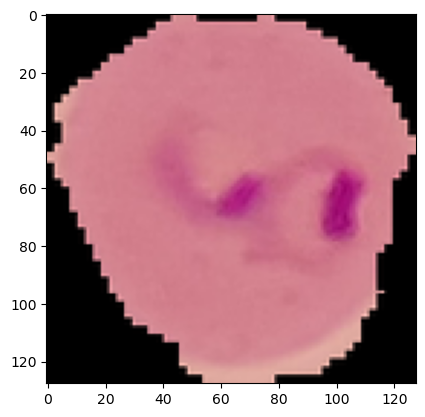

In [45]:
#Anomaly image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(para_file_paths[num])

1/1 [==============================] - 0s 32ms/step


C:\Users\Alex\AppData\Local\Temp\ipykernel_8136\3669532084.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 32ms/step - loss: 0.0059 - mse: 0.0059
The image is NOT an anomaly


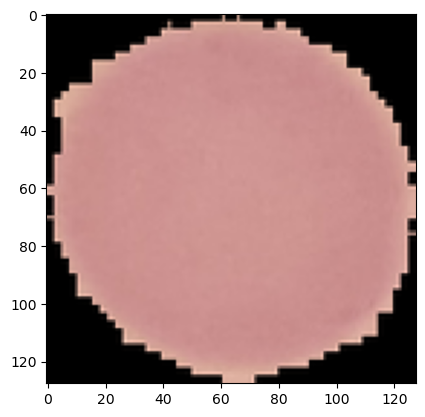

In [57]:
#Good/normal image verification
num=random.randint(0,len(uninfected_file_paths)-1)
check_anomaly(uninfected_file_paths[num])